In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
with open('reviews.json') as json_data:
    da = json.load(json_data)
    review_df = pd.DataFrame(da)

In [3]:
# we only need review after 2017-01-01
review_df.date = pd.to_datetime(review_df.date)
review_df=review_df[review_df['date']>='2017-01-01']

In [4]:
# transform the rate into numeric variables
for i in range(len(review_df.rate)):
    review_df.iloc[i,4]=review_df.rate[i][:3]
    review_df.iloc[i,6]=review_df.review_format[i][7:]

In [5]:
review_df.rate = review_df.rate.astype(float).fillna(0.0)

In [6]:
# take a look at the data
review_df.head()

,author,date,declarative,image,rate,review_body,review_format,review_title
0,Ryan Shi,2018-04-03,Verified Purchase,False,5.0,"small in size, good quality, bright enough. Th...",Black,"good quality, bright enough"
1,Fran Dux,2018-04-03,Verified Purchase,False,2.0,The zoom does not work on any of the flashligh...,4 Pack,I do not recommend this flashlight
2,CHENGCHEN,2018-04-02,Verified Purchase,False,5.0,These were great and worth every penny.,Black,Five Stars
3,Cindy,2018-03-31,Verified Purchase,False,5.0,This is a great mini flashlights! The size is ...,Black,This is a great mini flashlights
4,Andrew,2018-03-31,Verified Purchase,False,5.0,"Little cute flesh lights! Love it. Small , han...",Black,Love it. Small


In [7]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 760
Data columns (total 8 columns):
author           761 non-null object
date             761 non-null datetime64[ns]
declarative      761 non-null object
image            761 non-null bool
rate             761 non-null float64
review_body      761 non-null object
review_format    761 non-null object
review_title     761 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), object(5)
memory usage: 68.3+ KB


# EDA of the Amazon review dataset for Flashlights.

### Histogram of rates and insights from whether having images in the review or not.
 - Most of the rate are 5, and only few comments have images.
 - people updated images of the product tends to give high rate score as well.

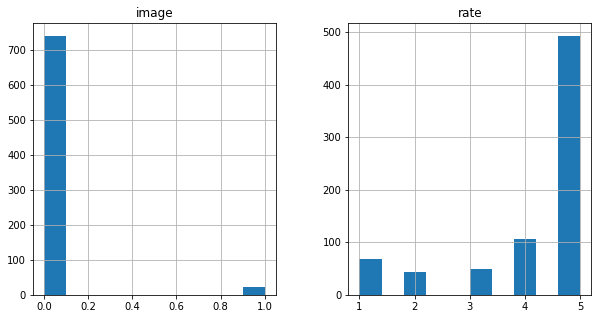

5.0    493
4.0    107
1.0     68
3.0     49
2.0     44
Name: rate, dtype: int64
False    739
True      22
Name: image, dtype: int64


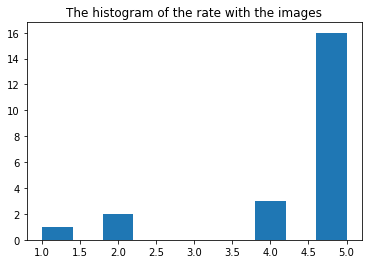

5.0    16
4.0     3
2.0     2
1.0     1
Name: rate, dtype: int64


In [8]:
%matplotlib inline
# histogram of the Amazon data
import matplotlib.pyplot as plt
review_df.hist(figsize=(10,5))
plt.show()
print(review_df.rate.value_counts())
print (review_df.image.value_counts())
image_review = review_df[review_df.image==True]
plt.hist(image_review.rate)
plt.title('The histogram of the rate with the images')
plt.show()
print(image_review.rate.value_counts())
#image_review.rate.value_count()

### Insight from products formats(Black, 4-pack, and 6-pack)
 - Most of the customers bought black and only few bought 4-pack and 6-pack. 
 - Customers bought 4-pack and 6-pack product tend to give high review score.

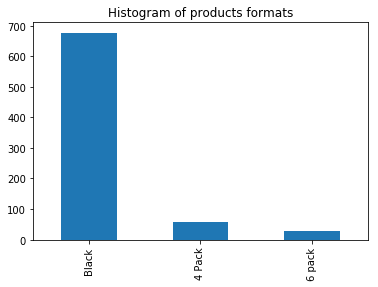

Black     677
4 Pack     57
6 pack     27
Name: review_format, dtype: int64

In [9]:
review_df.review_format.value_counts().plot('bar')
plt.title('Histogram of products formats')
plt.show()
review_df.review_format.value_counts()

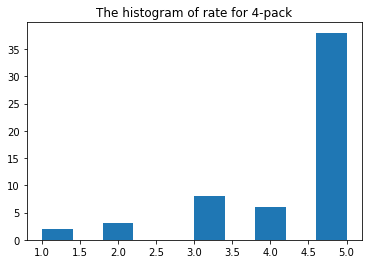

5.0    38
3.0     8
4.0     6
2.0     3
1.0     2
Name: rate, dtype: int64


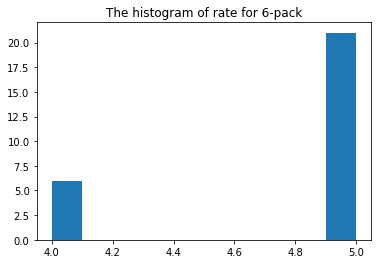

5.0    21
4.0     6
Name: rate, dtype: int64


In [10]:
pack4_review = review_df[review_df.review_format=='4 Pack']
plt.hist(pack4_review.rate)
plt.title('The histogram of rate for 4-pack')
plt.show()
print(pack4_review.rate.value_counts())
pack6_review = review_df[review_df.review_format=='6 pack']
plt.hist(pack6_review.rate)
plt.title('The histogram of rate for 6-pack')
plt.show()
print(pack6_review.rate.value_counts())

In [11]:
review_df

,author,date,declarative,image,rate,review_body,review_format,review_title
0,Ryan Shi,2018-04-03,Verified Purchase,False,5.0,"small in size, good quality, bright enough. Th...",Black,"good quality, bright enough"
1,Fran Dux,2018-04-03,Verified Purchase,False,2.0,The zoom does not work on any of the flashligh...,4 Pack,I do not recommend this flashlight
2,CHENGCHEN,2018-04-02,Verified Purchase,False,5.0,These were great and worth every penny.,Black,Five Stars
3,Cindy,2018-03-31,Verified Purchase,False,5.0,This is a great mini flashlights! The size is ...,Black,This is a great mini flashlights
4,Andrew,2018-03-31,Verified Purchase,False,5.0,"Little cute flesh lights! Love it. Small , han...",Black,Love it. Small
5,Harbinger of books,2018-03-30,Verified Purchase,False,4.0,This is a small compact flashlight with a brig...,Black,Great value
6,QW,2018-03-28,Verified Purchase,False,5.0,The flashlights are great for the price. It fi...,Black,"Great flashlight, runs on AA batteries"
7,Lisa12138,2018-03-28,Verified Purchase,False,5.0,Love it. So useful when I trying to fix my pip...,Black,Great product!!!!!!
8,Suki,2018-03-28,Verified Purchase,False,5.0,These came in handy during Hurricane Irma. We ...,Black,Good on batteries
9,Summy,2018-03-28,Verified Purchase,False,5.0,This flashlight is super bright. I can have my...,Black,This flashlight is super bright. I can have my...


### Authors' names analyzing: check if spammers exist. 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
cv = CountVectorizer(lowercase=True, max_features=30)
data_name = cv.fit_transform(review_df.author)
#data_name.toarray()
uniname_array = data_name.toarray()
print ('First 30 the most frequent bigrams in the reviewers\'s name:')
print (cv.get_feature_names())
print ('\nHow many times they appears:')
print (uniname_array.sum(axis=0))

First 30 the most frequent bigrams in the reviewers's name:
['aaron', 'amazon', 'charles', 'chris', 'customer', 'dan', 'daniel', 'david', 'de', 'douglas', 'ed', 'edward', 'eric', 'george', 'james', 'john', 'josh', 'jr', 'mark', 'mary', 'michael', 'mike', 'of', 'richard', 'robert', 'ryan', 'smith', 'the', 'tom', 'william']

How many times they appears:
[ 3 82  5  6 85  3  4  5  5  4  3  5  5  5  9  7  3  3  3  3 11  6  3  8
  9  5  3  4  4  5]


In [14]:
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(2, 2), max_features=20)
data_name_bigram = cv.fit_transform(review_df.author)
biname_array = data_name_bigram.toarray()
#print(data_name_bigram.toarray())
print ('First 20 the most frequent bigrams in the reviewers\'s name:')
print (cv.get_feature_names())
print ('\nHow many times they appears:')
print (biname_array.sum(axis=0))

First 20 the most frequent bigrams in the reviewers's name:
['201 escape', 'amazon customer', 'cliente amazon', 'miguel arellano', 'miguel niño', 'mike holmes', 'miller jr', 'mohand reyyashi', 'mohit gangwani', 'mr charles', 'ms dee', 'ms dimas', 'natalie sanchez', 'nelson jr', 'nic ng', 'nicholas caporusso', 'nicole friez', 'nikki sotelo', 'niño lara', 'norman avelenda']

How many times they appears:
[ 1 80  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [15]:
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(3, 3))
data_name_bigram = cv.fit_transform(review_df.author)
biname_array = data_name_bigram.toarray()
#print(data_name_bigram.toarray())
print ('The most frequent trigrams in the reviewers\'s name:')
print (cv.get_feature_names())
print ('\nHow many times they appears:')
print (biname_array.sum(axis=0))

The most frequent trigrams in the reviewers's name:
['201 escape room', 'amazon customer k4gwg', 'butta yehonatan yaakove', 'caroline dai prá', 'cattle dog lady', 'charles boy jr', 'crazy cattle dog', 'customer k4gwg gmail', 'dee burdick desanti', 'dr lrf dpt', 'george miller jr', 'james yelle sr', 'jesus la torre', 'k4gwg gmail om', 'luis miguel niño', 'miguel niño lara', 'mr charles keiper', 'red shoe lover', 'reyes eli banda', 'robert nelson jr', 'spaniel luver todd', 'suite 201 escape', 'wade alexander wright', 'wi farm family', 'william lee hannibal', 'william van nostrand']

How many times they appears:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
# group by names 
counts = review_df.groupby('author').size()
df2 = pd.DataFrame(counts, columns = ['size'])
df2[df2['size']>1]

,size
author,
Aaron,2
Amazon Customer,78
Andrew,2
B,2
CJ,2
Chris,4
Cliente de Amazon,2
Dan,2
Eric,4


### Insight: 
- As it can be seen from the above analysis, there are many authors' names starting with **Amazon customer** (there are at least 80 in totoal).
- The next step is to check if they are spammers which might be possible to give very high rate.

### First, check users with user name of 'Amazon Customer'.
- As it can be seen from the below analysis, some of the review are poor quality and there might have some fake review in this 'Amazon Customer' subset.

In [17]:
# First, we should check the replicated name 'Amazon Customer' to see if there are fake reviews from these users.
index_amazon = []
for i in range(len(review_df.author)):
    if review_df.iloc[i, 0].startswith('Amazon'):
        index_amazon.append(i)
df_new = review_df.loc[index_amazon, :]
df_new

,author,date,declarative,image,rate,review_body,review_format,review_title
12,Amazon Customer,2018-03-25,Verified Purchase,False,5.0,"A perfect flashlight,it’s easy to carry .The l...",Black,"A perfect flashlight, it’s easy to carry"
15,Amazon Customer,2018-03-20,Verified Purchase,False,5.0,These small LED flashlights are wonderful! Sm...,Black,Five Stars
23,Amazon Customer,2018-03-12,Verified Purchase,False,5.0,Excellent deal for a pair of probably most eff...,Black,Five Stars
50,Amazon Customer,2018-01-27,Verified Purchase,False,4.0,The best thing on this phone is that it is stu...,Black,Great small flashlight!
53,Amazon Customer,2018-01-25,Verified Purchase,False,3.0,These lights seem to have issues after a littl...,Black,Uhh
54,Amazon Customer,2018-01-20,Verified Purchase,False,3.0,GREAT LITTLE FLASH LITE,Black,Three Stars
57,Amazon Customer,2018-01-17,Verified Purchase,False,5.0,"GREAT little flashlights! Powerful, tough, in...",Black,"Powerful, tough, inexpensive"
77,Amazon Customer,2018-01-05,Verified Purchase,False,2.0,"They look nice but bad quality, they rarely co...",Black,They look nice but bad quality
79,Amazon Customer,2018-01-04,Verified Purchase,False,4.0,Nice product for a good price. Wish it had a s...,Black,Nice product for a good price
89,Amazon Customer,2017-12-23,Verified Purchase,False,5.0,Great value for the money would recommend to a...,Black,Five Stars


In [18]:
length = []
for i in range(len(df_new.author)):
    length_name = len(df_new.iloc[i, 0])
    length.append(length_name)

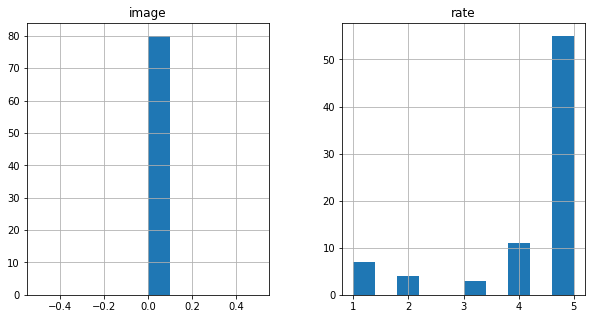

In [19]:
#plot histogram of the 'Amazon Customer'
df_new.hist(figsize=(10,5))
plt.show()
# these customers never update images of the products.
# 

In [20]:
# if we only take user with name "amazon customer", rate >=5, and the review length < 10.
# it seems these customers might be some one-time customers which is possible to be fake customers.
list_index = []
for i in range(len(df_new.review_body)):
    count = len(re.findall(r'\w+', df_new.iloc[i,5]))
    rate = df_new.iloc[i,4]
    if count<10 and rate>=4:
        list_index.append(i)
df_new.iloc[list_index, :]

,author,date,declarative,image,rate,review_body,review_format,review_title
57,Amazon Customer,2018-01-17,Verified Purchase,False,5.0,"GREAT little flashlights! Powerful, tough, in...",Black,"Powerful, tough, inexpensive"
92,Amazon Customer,2017-12-22,Verified Purchase,False,5.0,Very bright nice flashlight.,Black,Five Stars
138,Amazon Customer,2017-11-17,Verified Purchase,False,5.0,perfect little flashlights!,4 Pack,Love these cute little flashlights
174,Amazon Customer,2017-11-01,Verified Purchase,False,5.0,Awesome flashlights!,Black,Five Stars
181,Amazon Customer,2017-10-28,Verified Purchase,False,5.0,Great lights,Black,Five Stars
182,Amazon Customer,2017-10-28,Verified Purchase,False,5.0,Perfect,Black,Five Stars
184,Amazon Customer,2017-10-26,Verified Purchase,False,4.0,Great flash Light for a great price.,Black,Four Stars
214,Amazon Customer,2017-10-15,Verified Purchase,False,5.0,nice flashlight for the value.....,Black,Five Stars
236,Amazon Customer,2017-10-04,Verified Purchase,False,5.0,Good light at cheap price,4 Pack,Five Stars
315,Amazon Customer,2017-09-12,Verified Purchase,False,5.0,Awesome flashlights! Definitely recommend!,4 Pack,Awesome Flashlights!


### Then, check users with one-word username and two-word username. 
- As it can be seen from the below analysis, some of the review are poor quality and there might have some fake review in this 'Amazon Customer' subset. 
- And comparing to the previous analysis, it's more possible to have fake reviews from these two subsets.

In [21]:
# Get the histogram of the usernames' length.
cv = CountVectorizer(lowercase=True)
data_name = cv.fit_transform(review_df.author)
uniname_array = data_name.toarray()
name_array = uniname_array.sum(axis=1)

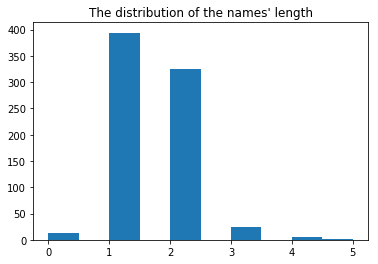

In [22]:
plt.hist(name_array)
plt.title('The distribution of the names\' length')
plt.show()
# most of the usernames are in 2 words or 3 words.

In [23]:
# get two seprate dataframe for one-word name and two-word name users.
two_name_customer = []
one_name_customer = []
for i in range(len(review_df.author)):
    count = len(re.findall(r'\w+', review_df.iloc[i,0]))
    if count == 2:
        two_name_customer.append(i)
    if count == 1:
        one_name_customer.append(i)
df_biname = review_df.loc[two_name_customer, :]
df_uniname = review_df.loc[one_name_customer, :]

In [24]:
review_length_biname = []
for i in range(len(df_biname.review_body)):
    #n_count = 
    count = len(re.findall(r'\w+', df_biname.iloc[i,5]))
    if count<10:
        list_index.append(i)
    review_length_biname.append(count)

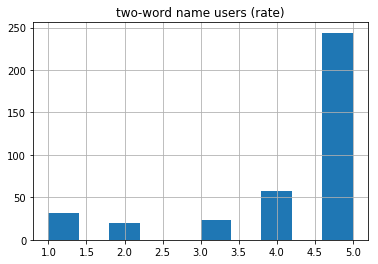

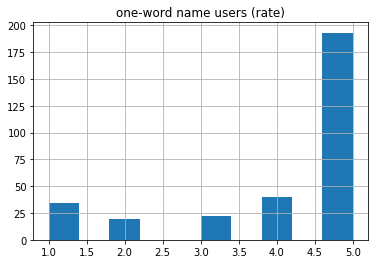

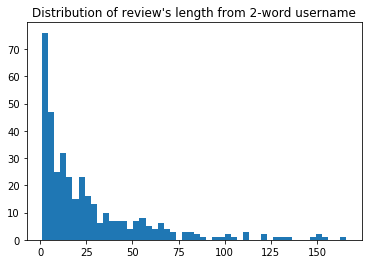

In [25]:
df_biname.rate.hist()
plt.title('two-word name users (rate)')
plt.show()
df_uniname.rate.hist()
plt.title('one-word name users (rate)')
plt.show()
plt.hist(review_length_biname, bins=50)
plt.title('Distribution of review\'s length from 2-word username')
plt.show()

In [26]:
list_index_two = []
for i in range(len(df_biname.review_body)):
    #n_count = 
    count = len(re.findall(r'\w+', df_biname.iloc[i,5]))
    rate = df_biname.iloc[i,4]
    if count<10 and rate>=4:
        list_index_two.append(i)
    #review_length_biname.append(count)

In [27]:
df_biname.iloc[list_index_two,:]

,author,date,declarative,image,rate,review_body,review_format,review_title
13,a.miller,2018-03-25,Verified Purchase,False,4.0,you get what pay for,Black,Four Stars
17,William Vuzzo,2018-03-18,Verified Purchase,False,5.0,These are great for work. Get the upgraded bat...,Black,Five Stars
20,Robert W.,2018-03-17,Verified Purchase,False,5.0,Works great.,6 pack,Five Stars
28,Hailing L.,2018-02-27,Verified Purchase,False,5.0,"works good, I used this during hurricane irma",Black,good
30,mohand reyyashi,2018-02-19,Verified Purchase,False,5.0,nice,Black,Five Stars
33,Guy Moore,2018-02-16,Verified Purchase,False,5.0,"great , small but powerful .",Black,"great, small but powerful"
57,Amazon Customer,2018-01-17,Verified Purchase,False,5.0,"GREAT little flashlights! Powerful, tough, in...",Black,"Powerful, tough, inexpensive"
73,Johnny K.,2018-01-07,Verified Purchase,False,5.0,"pleased with purchase, just as described",Black,Five Stars
92,Amazon Customer,2017-12-22,Verified Purchase,False,5.0,Very bright nice flashlight.,Black,Five Stars
100,bob k.,2017-12-17,Verified Purchase,False,5.0,Awesome lights!,Black,Five Stars


In [28]:
list_index_one = []
for i in range(len(df_uniname.review_body)):
    #n_count = 
    count = len(re.findall(r'\w+', df_uniname.iloc[i,5]))
    rate = df_uniname.iloc[i,4]
    if count<10 and rate >=4:
        list_index_one.append(i)
    #review_length_biname.append(count)

In [29]:
df_uniname.iloc[list_index_one,:]

,author,date,declarative,image,rate,review_body,review_format,review_title
2,CHENGCHEN,2018-04-02,Verified Purchase,False,5.0,These were great and worth every penny.,Black,Five Stars
10,Shelly,2018-03-27,Verified Purchase,False,5.0,"Small and exquisite, easy to carry around.",Black,easy to carry around
21,mdnike,2018-03-15,Verified Purchase,False,5.0,Great product,Black,Five Stars
22,PRT,2018-03-13,Verified Purchase,False,5.0,"GREAt, compact flashlight. Nice quality",Black,Five Stars
25,KBOWDRUMS,2018-03-10,Verified Purchase,False,5.0,Great little flashlights.,Black,Five Stars
35,Chris,2018-02-13,Verified Purchase,False,5.0,Small and powerful!,Black,Five Stars
37,iamjosearchila,2018-02-11,Verified Purchase,False,5.0,GReat Product!,Black,Five Stars
51,NPK,2018-01-27,Verified Purchase,False,5.0,BRIGHT! (and small),Black,Five Stars
63,Pedro,2018-01-13,Verified Purchase,False,5.0,Great product,Black,Five Stars
64,Tom,2018-01-12,Verified Purchase,False,4.0,"Pretty good, well made. not real sure about 300L",4 Pack,Four Stars


# Review and review title.

In [30]:
review_title = review_df.loc[:, 'review_title']
review_body = review_df.loc[:, 'review_body']

In [31]:
review_body.head()

0    small in size, good quality, bright enough. Th...
1    The zoom does not work on any of the flashligh...
2              These were great and worth every penny.
3    This is a great mini flashlights! The size is ...
4    Little cute flesh lights! Love it. Small , han...
Name: review_body, dtype: object

In [32]:
# to see the histogram of the length of the reviews
review_length = []
for i in range(len(review_body)):
    count = len(re.findall(r'\w+', review_body.loc[i]))
    review_length.append(count)

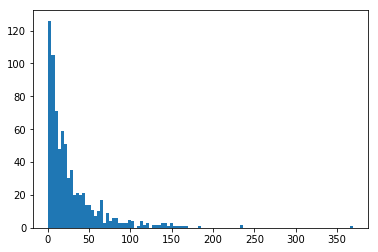

In [33]:
# the length of the review
plt.hist(review_length, bins =100)
plt.show()

In [34]:
import spacy
nlp = spacy.load('en')

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

In [36]:
class PartOfSpeechFilter(BaseEstimator, TransformerMixin):
    # must have the same name for the attributes, must has default, and must y = None.
    def __init__(self, pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'), stop_words=None):
        self.pos_to_keep = pos_to_keep
        self.stop_words = stop_words
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        preprocessed_sentences = []
        
        for doc in nlp.pipe(X, n_threads=8):
            if self.stop_words is not None:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep and t.lemma_ not in self.stop_words])
            else:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep])
            preprocessed_sentences.append(keep_tokens_string)
    
        return preprocessed_sentences 

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
pipeline = Pipeline([('posf', PartOfSpeechFilter()),
                     ('cv', CountVectorizer())
                   ])
pipeline.set_params(cv__lowercase=True,cv__max_df=0.95, cv__min_df=0.01, cv__stop_words='english')

Pipeline(memory=None,
     steps=[('posf', PartOfSpeechFilter(pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'),
          stop_words=None)), ('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_...   strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None))])

In [39]:
preproc_reviews = pipeline.fit_transform(review_body)
pipe_cv = pipeline.named_steps['cv']

In [40]:
preproc_reviews.shape # we have 761 reviews, which contain 189 words in total after preprocessing

(761, 189)

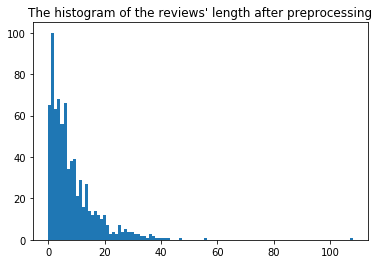

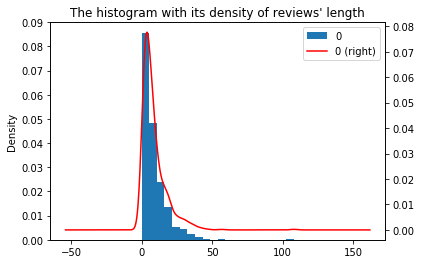

In [41]:
# distribution of review length after preprocessing
review_length = preproc_reviews.sum(axis=1)
length = review_length.A1.tolist()
length_df = pd.DataFrame(length)
#plt.subplot(1,2,1)
plt.hist(length, bins=100)
plt.title('The histogram of the reviews\' length after preprocessing')

ax = length_df.plot(kind='hist', bins=20, density=True)
length_df.plot(kind='kde', ax=ax, secondary_y=True, color='r')
plt.title('The histogram with its density of reviews\' length')
plt.show()

In [42]:
# common words from the reviews
words_sum = preproc_reviews.sum(axis=0)
counts_per_word = list(zip(pipe_cv.get_feature_names(), words_sum.A1))
sorted(counts_per_word, key=lambda t: t[1], reverse=True)[:10]

[('flashlight', 380),
 ('light', 363),
 ('pron', 321),
 ('bright', 292),
 ('great', 229),
 ('work', 198),
 ('battery', 197),
 ('good', 179),
 ('use', 165),
 ('small', 142)]

- Here, we obviously need to add some words from the above list into the stop words list to eliminate the influence made by these meaningless words. In this case, we would add **[flashlight, light, pron]** into the new stop words list.

In [43]:
# extend the stop-words list
stop_words_update = list(pipe_cv.get_stop_words())
stop_words_update.append('pron')
stop_words_update.append('aa')

In [44]:
stop_words_list = ['flashlight', 'light']
pipeline.set_params(posf__stop_words=stop_words_list, cv__stop_words=stop_words_update)

Pipeline(memory=None,
     steps=[('posf', PartOfSpeechFilter(pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'),
          stop_words=['flashlight', 'light'])), ('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True...   strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None))])

In [45]:
preproc_reviews = pipeline.fit_transform(review_body)
pipe_cv = pipeline.named_steps['cv']

In [46]:
# the most popular words which might contain useful information in the reviews
words_sum = preproc_reviews.sum(axis=0)
counts_per_word = list(zip(pipe_cv.get_feature_names(), words_sum.A1))
sorted(counts_per_word, key=lambda t: t[1], reverse=True)[:20]

[('bright', 292),
 ('great', 229),
 ('work', 198),
 ('battery', 197),
 ('good', 179),
 ('use', 165),
 ('small', 142),
 ('little', 113),
 ('price', 103),
 ('buy', 97),
 ('mode', 75),
 ('size', 75),
 ('time', 68),
 ('turn', 62),
 ('like', 61),
 ('love', 61),
 ('nice', 61),
 ('pocket', 61),
 ('clip', 58),
 ('need', 55)]

### Then, we perform similar process to the review title.

In [47]:
preproc_titles = pipeline.fit_transform(review_title)
pipe_cv = pipeline.named_steps['cv']

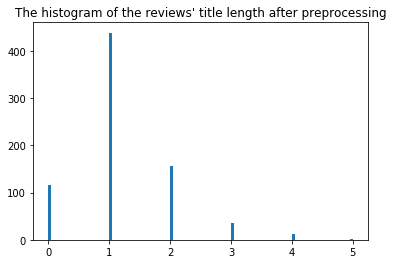

In [48]:
# length of the review title
review_length = preproc_titles.sum(axis=1)
length = review_length.A1.tolist()
length_df = pd.DataFrame(length)
#plt.subplot(1,2,1)
plt.hist(length, bins=100)
plt.title('The histogram of the reviews\' title length after preprocessing')
plt.show()

In [49]:
title_sum = preproc_titles.sum(axis=0)
title_counts_per_word = list(zip(pipe_cv.get_feature_names(), title_sum.A1))
sorted(title_counts_per_word, key=lambda t: t[1], reverse=True)[:]

[('star', 240),
 ('great', 111),
 ('good', 68),
 ('bright', 67),
 ('little', 43),
 ('small', 40),
 ('work', 35),
 ('price', 33),
 ('buy', 32),
 ('quality', 24),
 ('nice', 22),
 ('battery', 18),
 ('lead', 17),
 ('love', 17),
 ('size', 16),
 ('product', 15),
 ('perfect', 14),
 ('like', 13),
 ('deal', 12),
 ('expect', 11),
 ('value', 11),
 ('awesome', 10),
 ('handy', 10),
 ('compact', 9),
 ('flash', 9),
 ('use', 9),
 ('powerful', 8)]

- After analysis, I decide to add a new variable as **possible_fake_review**.
- The variable will be ***1(positive)*** if the following conditions are satisfied at the same time, otherwise, it will be ***0(negative)***:
    1. The author of the review is **'Amazon Customer'** or **two-word name**.
    2. The length of the review is equal to **1**.
    3. The review title is **'Five Stars'**.
    4. The rate is **5**.

In [50]:
for i in range(len(review_df.review_body)):
    author = review_df.loc[i, 'author']
    rate = review_df.loc[i, 'rate']
    title = review_df.loc[i, 'review_title']
    body = review_df.loc[i, 'review_body']
    if author =='Amazon Customer' or len(author) ==2 and len(body) ==1 and title=='Five Stars' and rate == 5.0:
        review_df.loc[i, 'fake_review'] = 1
    else:
        review_df.loc[i, 'fake_review'] = 0

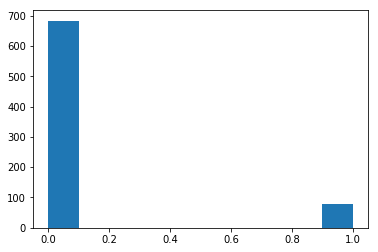

In [51]:
# see the histogram of the possible fake review.
plt.hist(review_df.fake_review)
plt.show()

# The next step is to build the model.

### Prepare X and y with TF-IDF and without TF-IDF

In [237]:
pipeline = Pipeline([('posf', PartOfSpeechFilter()),
                     ('cv', CountVectorizer())
                   ])
pipeline.set_params(cv__lowercase=True,cv__max_df=0.95, cv__min_df=0.01, cv__stop_words='english')
pipeline.set_params(posf__stop_words=stop_words_list, cv__stop_words=stop_words_update)

Pipeline(memory=None,
     steps=[('posf', PartOfSpeechFilter(pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'),
          stop_words=['flashlight', 'light'])), ('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True...   strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None))])

In [238]:
# features: image, review_body, review_format, review_title, fake_review
image = review_df.loc[:, 'image']
review_format = review_df.loc[:,'review_format']
title_pre = review_df.loc[:,'review_title']
title = pipeline.fit_transform(title_pre)
body_pre = review_df.loc[:,'review_body']
body = pipeline.fit_transform(body_pre)
fake = review_df.loc[:, 'fake_review']
y = review_df.loc[:, 'rate']

In [239]:
def to_array_variabel(df, shape = (100,100)):
    to_array = pd.factorize(df)[0]
    #to_array = pd.DataFrame.as_matrix(df)
    var_array = np.reshape(to_array, shape)
    return var_array

In [216]:
image_array = to_array_variabel(image, (761,1))
format_array = to_array_variabel(review_format, (761,1))
fake_array = to_array_variabel(fake, (761,1))
# the order of the variables are image, formate, body, title, fake
X = np.hstack((image_array, format_array, body.toarray(), title.toarray(), fake_array))

In [217]:
# prepare tf-idf dataset

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [219]:
pipeline_tfidf = Pipeline([('posf', PartOfSpeechFilter()),
                     ('tfidf', TfidfVectorizer())
                   ])
pipeline_tfidf.set_params(posf__stop_words=stop_words_list, tfidf__lowercase=True, tfidf__max_df=0.95, 
                    tfidf__min_df=0.01, tfidf__stop_words=stop_words_update, tfidf__norm='l2', tfidf__use_idf=True)

Pipeline(memory=None,
     steps=[('posf', PartOfSpeechFilter(pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'),
          stop_words=['flashlight', 'light'])), ('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=T...
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None))])

In [220]:
image = review_df.loc[:, 'image']
review_format = review_df.loc[:,'review_format']
title_pre = review_df.loc[:,'review_title']
title = pipeline_tfidf.fit_transform(title_pre)
body_pre = review_df.loc[:,'review_body']
body = pipeline_tfidf.fit_transform(body_pre)
fake = review_df.loc[:, 'fake_review']
y_tfidf = review_df.loc[:, 'rate']

In [221]:
image_array = to_array_variabel(image, (761,1))
format_array = to_array_variabel(review_format, (761,1))
fake_array = to_array_variabel(fake, (761,1))
# the order of the variables are image, formate, body, title, fake
X_tfidf = np.hstack((image_array, format_array, body.toarray(), title.toarray(), fake_array))

In [222]:
# without tf-itf:
# X and y
# with tf-idf:
# X_tfidf and y_tfidf

## 1. Logistic Regression

In [240]:
from sklearn.linear_model import LogisticRegression

In [241]:
lr = LogisticRegression()
# you should look at the attributes of the function.
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [242]:
X_df = pd.DataFrame(X)
training_test = X_df.sample(200, random_state=42)
training_test_labels = rate.loc[training_test.index]#lr.score()

In [243]:
preproc_training_test = pd.DataFrame.as_matrix(training_test)

In [244]:
# the logistic regression accuracy score
lr.score(preproc_training_test, training_test_labels)

0.795

In [245]:
from sklearn.metrics import confusion_matrix

In [246]:
# check the confusion matrix
# it seems that many rates are predicted as 5 point, which generates the most of errors.
conf_matrix = confusion_matrix(training_test_labels, lr.predict(preproc_training_test), labels=[1,2,3,4,5])
conf_matrix

array([[ 16,   0,   0,   1,   3],
       [  2,   7,   0,   0,   3],
       [  2,   0,   5,   2,   9],
       [  1,   0,   0,  10,  14],
       [  1,   0,   1,   2, 121]])

- Changing parameters of the model as below

In [247]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [248]:
# using the default parameters of the logistic regression
lr = LogisticRegression(random_state=20)
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=20, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [249]:
scores = cross_validate(lr, new, rate, cv=10, 
                        scoring=['accuracy'],
                        return_train_score=True
                       )
scores
# overfitting issue exists possibly

{'fit_time': array([0.01495504, 0.01502609, 0.01378298, 0.01856303, 0.01400709,
        0.01789093, 0.014853  , 0.0148921 , 0.01514411, 0.01370096]),
 'score_time': array([0.00073791, 0.00058007, 0.00057125, 0.00048995, 0.0004487 ,
        0.0006659 , 0.00046992, 0.00046682, 0.00046992, 0.00043106]),
 'test_accuracy': array([0.67948718, 0.69230769, 0.67948718, 0.64935065, 0.69736842,
        0.61842105, 0.68421053, 0.72      , 0.68918919, 0.69863014]),
 'train_accuracy': array([0.8272328 , 0.8374817 , 0.83308931, 0.8377193 , 0.8189781 ,
        0.83649635, 0.83211679, 0.83236152, 0.83260553, 0.82994186])}

In [250]:
print ('The mean of test_accuracy of the model with the default hyperparameter:')
scores['test_accuracy'].mean()

The mean of test_accuracy of the model with the default hyperparameter:


0.6808452026808192

In [251]:
# Change some of the parameters to see how the model fits
lr2 = LogisticRegression(solver='saga', multi_class='multinomial', random_state=20, max_iter=1000)
lr2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=20, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [253]:
scores = cross_validate(lr2, X, y, cv=10, 
                        scoring=['accuracy'],
                        return_train_score=True
                       )
scores

{'fit_time': array([0.98124623, 1.88559484, 1.70450997, 1.53492403, 1.70120692,
        1.6290822 , 1.59259391, 1.62643027, 1.60500932, 1.59930587]),
 'score_time': array([0.00049591, 0.0004952 , 0.00049996, 0.00049686, 0.00043797,
        0.00043583, 0.00045896, 0.0005548 , 0.00049877, 0.00049305]),
 'test_accuracy': array([0.66666667, 0.70512821, 0.67948718, 0.62337662, 0.71052632,
        0.61842105, 0.68421053, 0.73333333, 0.66216216, 0.68493151]),
 'train_accuracy': array([0.85358712, 0.8682284 , 0.86090776, 0.86695906, 0.85255474,
        0.85839416, 0.85109489, 0.84548105, 0.8558952 , 0.84738372])}

In [254]:
scores['test_accuracy'].mean()
# the accuracy hasn't changed at all.
# then, we are going to decide the best combination of the model

0.6768243571740327

In [255]:
from sklearn.model_selection import GridSearchCV

In [273]:
# hyperparameter combinations test
lr = LogisticRegression(random_state=20, max_iter=10000)
param_grid = { 'C': [1, 0.5, 5, 10,100], 'multi_class' : ['ovr','multinomial'], 'solver':['saga','newton-cg', 'lbfgs']}
grid = GridSearchCV(lr, param_grid=param_grid, cv=10, n_jobs=-1)

In [274]:
%%time
grid.fit(X, y)

CPU times: user 2 s, sys: 82.9 ms, total: 2.09 s
Wall time: 2min 30s


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=20, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 0.5, 5, 10, 100], 'multi_class': ['multinomial'], 'solver': ['saga', 'newton-cg', 'lbfgs']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [275]:
# the best parameters for the logistic regression is:

grid.best_params_

{'C': 0.5, 'multi_class': 'multinomial', 'solver': 'saga'}

In [276]:
# the finally logistic regression model:
grid.cv_results_['mean_test_score']

array([0.67674113, 0.67674113, 0.67674113, 0.68199737, 0.68199737,
       0.68199737, 0.64520368, 0.6478318 , 0.6478318 , 0.63206307,
       0.6346912 , 0.6346912 , 0.61235217, 0.60183968, 0.60183968])

- **66.5%** seems the best accuracy we can get from the logistic regression with **CountVectorizer** method
- Using the logistic regression method with **TF-IDF** for the preprocessing.

In [262]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [263]:
pipeline_tfidf = Pipeline([('posf', PartOfSpeechFilter()),
                     ('tfidf', TfidfVectorizer())
                   ])
pipeline_tfidf.set_params(posf__stop_words=stop_words_list, tfidf__lowercase=True, tfidf__max_df=0.95, 
                    tfidf__min_df=0.01, tfidf__stop_words=stop_words_update, tfidf__norm='l2', tfidf__use_idf=True)

Pipeline(memory=None,
     steps=[('posf', PartOfSpeechFilter(pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'),
          stop_words=['flashlight', 'light'])), ('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=T...
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None))])

In [264]:
# hyperparameter combinations test
lr = LogisticRegression(random_state=20, max_iter=10000)
param_grid = { 'C': [1, 0.5, 5, 10,100], 'multi_class' : ['ovr', 'multinomial'], 'solver':['saga','newton-cg', 'lbfgs']}
grid_tfidf = GridSearchCV(lr, param_grid=param_grid, cv=10, n_jobs=-1)

In [265]:
%%time
grid_tfidf.fit(X_tfidf, y_tfidf)

CPU times: user 1.88 s, sys: 280 ms, total: 2.16 s
Wall time: 1min 34s


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=20, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 0.5, 5, 10, 100], 'multi_class': ['ovr', 'multinomial'], 'solver': ['saga', 'newton-cg', 'lbfgs']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [266]:
grid_tfidf.best_params_

{'C': 1, 'multi_class': 'multinomial', 'solver': 'saga'}

In [267]:
grid_tfidf.cv_results_['mean_test_score']

array([0.67148489, 0.67148489, 0.67148489, 0.67279895, 0.67279895,
       0.67279895, 0.6609724 , 0.6609724 , 0.6609724 , 0.66885677,
       0.66885677, 0.66885677, 0.65965834, 0.65965834, 0.65965834,
       0.64520368, 0.64520368, 0.64520368, 0.65045992, 0.65045992,
       0.65045992, 0.63863338, 0.63863338, 0.63863338, 0.60840999,
       0.60709593, 0.60709593, 0.60315375, 0.60052562, 0.60052562])

- It seems we have a slightly worse result **(accuracy of 65.83%)** with the TF-ITF method than without TF-ITF method.
- And it's very possible we have overfitting issue here. Because we have multiclass and nonlinear data, the logistic regression doesn't work very well in this case.

## 2. SVM model

In [153]:
from sklearn.svm import SVC

In [268]:
# fit svc model with default hyperparameters
svc = SVC()
scores = cross_validate(svc, X_tfidf, y_tfidf, cv=10, n_jobs=-1, return_train_score=True)
print ('The mean of test_accuracy of the model with the default hyperparameter of SVC model:')
scores['test_score'].mean()

The mean of test_accuracy of the model with the default hyperparameter of SVC model:


0.6480379457964173

In [269]:
# find the best combination of the hyperparameters
svc = SVC(random_state=20)
param_grid = { 'C': [1, 0.5, 5, 10,100], 'decision_function_shape':['ovo', 'ovr'], 'kernel':['linear', 'rbf']}
grid_svc = GridSearchCV(svc, param_grid=param_grid, cv=10, n_jobs=-1)

In [270]:
%%time
grid_svc.fit(X_tfidf, y_tfidf)

CPU times: user 1.33 s, sys: 85.2 ms, total: 1.41 s
Wall time: 18.3 s


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=20, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 0.5, 5, 10, 100], 'decision_function_shape': ['ovo', 'ovr'], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [271]:
grid_svc.best_params_

{'C': 0.5, 'decision_function_shape': 'ovo', 'kernel': 'linear'}

In [272]:
grid_svc.cv_results_['mean_test_score']

array([0.67279895, 0.6478318 , 0.67279895, 0.6478318 , 0.68068331,
       0.6478318 , 0.68068331, 0.6478318 , 0.63074901, 0.6478318 ,
       0.63074901, 0.6478318 , 0.61235217, 0.6478318 , 0.61235217,
       0.6478318 , 0.55978975, 0.68068331, 0.55978975, 0.68068331])

- It seems we have a similar result (accuracy of 65.83%) with the previous model.
- All the models that we used didn't get good results but very similar result ( accuracy around 65%-66% ). Maybe it is because we are using **too many features** and some of the words in review are not very usefull which might introduce **noisy** instead.
- The next step is to use the test data we saved before to test the models. Here, we will only test the logistic regession and SVC model with **TF-IDF preprocessing**.